# NT532 - CÔNG NGHỆ INTERNET OF THINGS HIỆN ĐẠI

**Hướng dẫn**:
*   Khởi động runtime: chọn **Connect** tại góc trên bên phải.
*   Hoàn thành tất cả các mục có comment `YOUR CODE HERE` và các câu hỏi được thể hiện.
*   Chạy toàn bộ các block code để kiểm tra: Ở thanh menu, chọn Runtime$\rightarrow$Run all.

---

# PHẦN 1: CÀI ĐẶT MÔ HÌNH LINEAR REGRESSION VỚI KERAS

## 1. Import các thư viện Keras

Đầu tiên, chúng ta sẽ import các thư viện, module, hàm của `Keras`:
- `Input`: để nhận dữ liệu đầu vào cho mô hình.
- `Dense`: hay còn gọi là lớp Fully Connected (Lớp kết nối đầy đủ), một thành phần quan trọng của các mô hình dựa trên mạng Neural Network.
- `Model`: đây là lớp đối tượng mô hình được sử dụng để đóng gói lớp đầu vào, đầu ra, sau đó huấn luyện với phương thức `fit` và dự đoán kết quả với `predict`.
- `load_model`: hàm sử dụng để load mô hình lên từ file.

In [ ]:
from keras.layers import Input, Dense
from keras import Model
import tensorflow as tf
from keras.models import load_model

## 2. Tạo dữ liệu mẫu (toy example)
Tiếp theo, ta sẽ tiến hành tạo dữ liệu mẫu để huấn luyện và kiểm thử.

Dữ liệu được tạo ra là các điểm xoay xung quanh một đường thẳng cho trước với một số nhiễu được thêm vào trên từng điểm dữ liệu.

Đường thẳng được khởi tạo theo qui tắc: 
`y = [(STT nhóm - 5 + 3 - 2) + STT nhóm % (2 + 1)] * x + STT nhóm * random(0,3)`

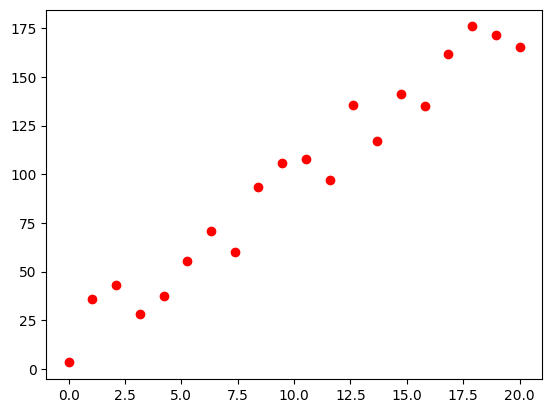

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Khởi tạo đường thẳng theo qui tắc ở trên
# x được cho trước và y được tạo từ đường thẳng trên và cộng thêm nhiễu dược khởi tạo ngẫu nhiên

# YOUR CODE HERE
STT_nhom = 12
x_train = np.linspace(0, 20, 20)
y_train = ((STT_nhom - 5 + 3 - 2) + STT_nhom % (2 + 1)) * x_train + STT_nhom * np.random.uniform(0, 3, size = 20)

# Trực quan hóa dữ liệu bằng các hình tròn màu đỏ
plt.plot(x_train, y_train, 'ro')
plt.show()

## 3. Cài đặt mô hình Linear Regression
Tiếp đến, chúng ta sẽ tiến hành định nghĩa mô hình Linear Regression dựa trên các đối tượng được cung cấp bởi Keras. Các nội dung này sinh viên cần tìm hiểu ý nghĩa, cách thức sử dụng để hiểu được nội dung được định nghĩa.

<p align="center">
  <img src="https://static.wixstatic.com/media/a27d24_c73a810c7b9e43c9b339ca529d9c9122~mv2.png" />
</p>



In [ ]:
#  - Tạo biến `input` với lớp đối tượng `Input` của Keras, truyền vào kích thước đầu vào `input_dim`
#  - Tạo biến `output` với lớp đối tượng `Dense` của Keras, truyền vào các tham số: kích thước output, có sử dụng bias, không sử dụng hàm activation
#  - Cuối cùng, khởi tạo mô hình với `Model` của Keras, truyền vào `input` và `output` để tạo thành mô hình

# input_dim được gọi là số chiều của vector đầu vào. Vậy theo bạn, input_dim của bài toán Linear Regression bằng bao nhiêu? Giải thích.
# Trong bài toán Linear Regression, input_dim đại diện cho số chiều của vector đầu vào, hay còn được gọi là số lượng đặc trưng (features) trong dữ liệu đầu vào.
# Khi huấn luyện mô hình Linear Regression, chúng ta cần xác định các đặc trưng (features) để dự đoán giá trị đầu ra. Ví dụ, nếu chúng ta đang dự đoán giá nhà dựa trên diện tích và số phòng ngủ, thì chúng ta có 2 đặc trưng - diện tích và số phòng ngủ.
# Khi biểu diễn dữ liệu đầu vào dưới dạng vector, mỗi đặc trưng sẽ tương ứng với một chiều trong vector. Ví dụ, nếu chúng ta có 2 đặc trưng - diện tích và số phòng ngủ, vector đầu vào sẽ có 2 chiều. Do đó, input_dim (số chiều của vector đầu vào) trong trường hợp này là 2.
# YOUR CODE HERE
input_dim = 1

input = Input(shape = input_dim)
output = Dense(1, use_bias=True, activation=None)(input)
LinearRegression = Model(input, output)

# Để hiển thị kiến trúc của mô hình ta gọi phương thức `summary`
print("The architecture of Linear Regression model: ")
LinearRegression.summary()

The architecture of Linear Regression model: 
Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_7 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
opt = tf.keras.optimizers.SGD(learning_rate=0.1) # Stochastic Gradient Descent

# Tìm hiểu về loss function. Loss function được sử dụng trong Linear Regression là gì?
# Trong Linear Regression, hàm loss function phổ biến nhất là Mean Squared Error (MSE), hay còn gọi là độ lỗi bình phương trung bình.
# MSE được tính bằng cách lấy trung bình của bình phương sai số (squared error) giữa giá trị dự đoán của mô hình và giá trị thực tế trong tập huấn luyện. Công thức của MSE như sau:
# MSE = (1/N) * Σ(y - ŷ)^2
# Mục tiêu của việc tối thiểu hóa MSE là điều chỉnh các tham số (trọng số và bias) của mô hình sao cho giá trị dự đoán của mô hình tiệm cận với giá trị thực tế và sai số là nhỏ nhất.
# Bằng cách sử dụng MSE làm loss function, chúng ta có thể áp dụng các thuật toán tối ưu hóa như Gradient Descent để tìm ra bộ trọng số và bias tối ưu cho mô hình Linear Regression. Mục tiêu là tối thiểu hóa giá trị của MSE để đạt được một mô hình có khả năng dự đoán tốt nhất cho các giá trị đầu vào mới.
# YOUR CODE HERE
loss = 'mae'

LinearRegression.compile(optimizer=opt, loss=loss)

# Thông số epochs là gì?
# Thông số epochs (hoặc vòng lặp) xác định số lần mô hình sẽ được huấn luyện trên toàn bộ tập dữ liệu huấn luyện.
hist = LinearRegression.fit(x_train, y_train, epochs=35)

Epoch 1/35
1/1 [==============================] - 0s 284ms/step - loss: 101.0144
Epoch 2/35
1/1 [==============================] - 0s 8ms/step - loss: 90.9144
Epoch 3/35
1/1 [==============================] - 0s 11ms/step - loss: 80.8144
Epoch 4/35
1/1 [==============================] - 0s 10ms/step - loss: 70.7144
Epoch 5/35
1/1 [==============================] - 0s 9ms/step - loss: 60.6144
Epoch 6/35
1/1 [==============================] - 0s 8ms/step - loss: 50.5144
Epoch 7/35
1/1 [==============================] - 0s 8ms/step - loss: 40.4144
Epoch 8/35
1/1 [==============================] - 0s 8ms/step - loss: 30.3144
Epoch 9/35
1/1 [==============================] - 0s 8ms/step - loss: 20.2144
Epoch 10/35
1/1 [==============================] - 0s 8ms/step - loss: 12.0119
Epoch 11/35
1/1 [==============================] - 0s 9ms/step - loss: 11.2979
Epoch 12/35
1/1 [==============================] - 0s 9ms/step - loss: 10.9687
Epoch 13/35
1/1 [==============================] - 0s 8m

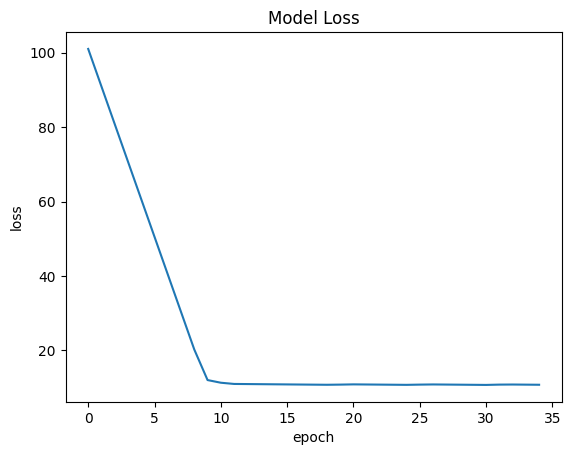

In [ ]:
# Hiển thị loss theo số epoch
plt.plot(hist.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

## 4. Lưu trữ và tái sử dụng model
Sau khi đã huấn luyện, ta lưu mô hình để có thể tái sử dụng trong tương lai. 

Sử dụng phương phương thức `save` để lưu trữ mô hình và `load_model` để tải lại mô hình và tái sử dụng. 

Điều này có thể áp dụng để sử dụng mô hình trong tương lai mà **KHÔNG CẦN PHẢI HUẤN LUYỆN LẠI**.

In [ ]:
LinearRegression.save('linear_regression_model.h5')

pretrain_LinearRegression = load_model('linear_regression_model.h5')

## 5. Trực quan hóa mô hình và dự đoán với dữ liệu test

In [ ]:
result = pretrain_LinearRegression.get_weights()
print('Tham số tối ưu: ')

# `theta` được gọi là gọi là hệ số học tập được thông qua quá trình huấn luyện
# bias được gọi là hệ số tự do
# Từ thông số `result` thu được, tìm theta và bias thu được

# YOUR CODE HERE
theta = result[0]
bias = result[1]

print('Trong đó: ')
print('   - bias (hệ số tự do) : ', bias)
print('   - theta (hệ số cho dữ liệu đầu vào): ', theta)

Tham số tối ưu: 
Trong đó: 
   - bias (hệ số tự do) :  [1.3899997]
   - theta (hệ số cho dữ liệu đầu vào):  [[9.45108]]


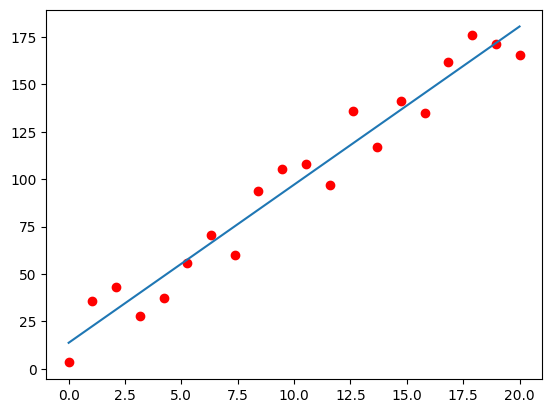

In [ ]:
# Trực quan hóa dữ liệu và mô hình sau khi huấn luyện
plt.plot(x_train, y_train, 'ro')

# Trực quan hóa mô hình
# Tìm cách vẽ dường thẳng thu được từ dữ liệu gốc và các hệ số thu thập được ở trên để thể hiện lên biểu đồ
# YOUR CODE HERE
from sklearn.linear_model import LinearRegression
x_train = x_train.reshape(-1, 1)
# Khởi tạo mô hình Linear Regression
model = LinearRegression()
# Huấn luyện mô hình trên dữ liệu huấn luyện
model.fit(x_train, y_train)
# Vẽ đường thẳng dự đoán trên biểu đồ
plt.plot(x_train, model.predict(x_train))

plt.show()

Nhận xét về tham số tối ưu và đường thẳng `y` được khởi tạo ở đầu bước 2 dùng để khởi tạo các điểm dữ liệu.

Nhận xét của bạn?

Cuối cùng, chúng ta sẽ thử nghiệm với dữ liệu kiểm tra x_test.
Từ đường thẳng `y` được khởi tạo.

In [ ]:
x_test = [-5, 0, 5]
y_pred = pretrain_LinearRegression.predict(x_test)

print("Các giá trị mà mô hình hồi quy dự đoán trên x_test: ", x_test)
print(y_pred)

1/1 [==============================] - 0s 41ms/step
Các giá trị mà mô hình hồi quy dự đoán trên x_test:  [-5, 0, 5]
[[-45.865402 ]
 [  1.3899997]
 [ 48.6454   ]]


Từ các nhận xét của bạn ở trên, hãy tiến hành nhận xét về kết quả thu được `y_pred` so với các giá trị sẽ đạt được khi sử dụng đường thẳng gốc `y`.


In [ ]:
options = ['Hả? Gì? Không biết nữa :( Không có biết :((((', 'Giá trị từ y và giá trị được dự đoán từ các tham số tối ưu là gần giống nhau', 'Giá trị từ y và giá trị được dự đoán từ các tham số tối ưu là một', 'Giá trị từ y và giá trị được dự đoán từ các tham số tối ưu là khác nhau']

# Hãy chọn your_choice bằng 0, 1, 2, 3 tương ứng với các lựa chọn ở trên
your_choice = 3
# YOUR CODE HERE

print("Kết quả không thể nào khác, đó chính là: ", options[your_choice])

Kết quả không thể nào khác, đó chính là:  Giá trị từ y và giá trị được dự đoán từ các tham số tối ưu là khác nhau


# PHẦN 2: SỬ DỤNG LINEAR REGRESSION VỚI BÀI TOÁN CỤ THỂ

Tại phần thực hành này, sinh viên sẽ tìm hiểu cách sử dụng dataset được cung cấp tại https://www.kaggle.com/datasets/budincsevity/szeged-weather

Đồng thời, chúng ta sẽ tìm hiểu về quy trình cơ bản khi bước đầu tiếp cận với Machine Learning.
<p align="center">
  <img src="https://912556475-files.gitbook.io/~/files/v0/b/gitbook-legacy-files/o/assets%2F-LxEH5JsS0dPf0_ZuSqD%2F-M1wiuy398NBw5hRkvvv%2F-M1wj99fwHoLQ4kNR5jW%2FSlide2.PNG?alt=media&token=ac4952bb-595b-4acf-8280-6814076c50bd" />
</p>


## 1. Chuẩn bị dữ liệu
Đầu tiên, chúng ta sẽ tiến hành download dữ liệu được cung cấp tại: https://www.kaggle.com/datasets/budincsevity/szeged-weather

Tiến hành copy dataset đã download ở trên vào drive của bạn, mount drive với google colab và lập trình để đọc file csv ở trên.

Cuối cùng, thực hiện phân tích, tiền xử lý dữ liệu, làm tiền đề để thực hiện huấn luyện mô hình.

In [ ]:
# Mount dữ liệu từ drive của bạn và google colab
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd

# Tiến hành đọc csv dataset bằng phương thức `read_csv` từ thư viện pandas

# YOUR CODE HERE
url_to_csv = "/content/sample_data/weatherHistory.csv"

data = pd.read_csv(url_to_csv)
data = pd.DataFrame(data)

In [ ]:
# Sử dụng `head` để kiểm tra tổng quát dataset
data.head(10)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.


In [ ]:
# Sử dụng `describe` để tổng hợp các thông số, góp phần phân tích dữ liệu rõ ràng hơn
data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [ ]:
# `shape` dùng để thể hiện số chiều của array
print(type(data))
data.shape

<class 'pandas.core.frame.DataFrame'>


(96453, 12)

In [ ]:
# Thể hiện các label của dữ liệu
data.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [ ]:
# Thể hiện số điểm dữ liệu NaN -> xử lý missing values
data.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [ ]:
# Cách 1: Bỏ các hàng missing values
# Lưu trữ lại và kiểm tra cách xử lý
drop_nan_data = data.copy()
drop_nan_data.dropna(inplace=True)  
drop_nan_data.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [ ]:
# Copy dữ liệu từ dataset gốc, tiến hành tạo trường hợp để xử lý missing values
replace_nan_data = data.iloc[95514:95519].copy()

# Kiểm tra dữ liệu copy được
print(replace_nan_data)

# Ta có thể quan sát được trường thông tin `Precip Type` có 2 giá trị NaN
# Thực hiện tạo dữ liệu giả `Humidity` trên 2 điểm dữ liệu này
replace_nan_data.loc[pd.isnull(replace_nan_data['Precip Type']), 'Humidity'] = np.nan

# Kiểm tra lại
print(replace_nan_data)

                      Formatted Date   Summary Precip Type  Temperature (C)  \
95514  2016-10-29 22:00:00.000 +0200     Clear         NaN        14.708730   
95515  2016-10-29 23:00:00.000 +0200     Clear         NaN        15.109921   
95516  2016-10-03 00:00:00.000 +0200  Overcast        rain        15.511111   
95517  2016-10-03 01:00:00.000 +0200  Overcast        rain        15.000000   
95518  2016-10-03 02:00:00.000 +0200  Overcast        rain        15.033333   

       Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
95514                  4.183333      0.71            17.9354   
95515                  3.488889      0.74            16.8889   
95516                 15.511111      0.96             6.1824   
95517                 15.000000      1.00             3.2200   
95518                 15.033333      1.00             4.1216   

       Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
95514                   319.0           0.0000         0.0   
95515           

In [ ]:
# Cách 2: Thay thế các hàng missing values bằng một giá trị xác định 
replace_nan_data['Precip Type'].fillna(value = 'rain', inplace=True)  

# Kiểm tra lại kết quả
print(replace_nan_data['Humidity'])

# Cách 3: Điền các missing values với giá trị `mean`
replace_nan_data['Humidity'].fillna(value = replace_nan_data['Humidity'].mean() , inplace=True)

# Kiểm tra lại
print(replace_nan_data['Humidity'])

95514     NaN
95515     NaN
95516    0.96
95517    1.00
95518    1.00
Name: Humidity, dtype: float64
95514    0.986667
95515    0.986667
95516    0.960000
95517    1.000000
95518    1.000000
Name: Humidity, dtype: float64


In [ ]:
# Tiếp theo, chúng ta sẽ tiến hành tạo dữ liệu ảo để tập làm quen với việc xử lý missing values đổi với trường `Temperature (C)`
data.loc[pd.isnull(data['Precip Type']), 'Temperature (C)'] = np.nan

# Cách 4: Tìm hiểu về `interpolate()` và thực hiện nội suy các giá trị NaN ở trên
# Phương thức interpolate() sẽ thực hiện nội suy giữa các giá trị NaN trong trường Temperature (C) dựa trên các giá trị có sẵn trong dữ liệu. Nó sẽ xác định các giá trị ở các vị trí NaN dựa trên các giá trị xung quanh và tạo ra một dãy giá trị mượt mà hơn để thay thế các giá trị NaN.
# YOUR CODE HERE
data['Temperature (C)'] = data['Temperature (C)'].interpolate()

data.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [ ]:
# Ta chọn 2 trường dữ liệu là `Humidity` và `Temperature (C)` để tiến hành phân tích và thực hiện
data_selected = data[['Humidity', 'Temperature (C)']]

In [ ]:
data_selected.head()

,Humidity,Temperature (C)
0,0.89,9.472222
1,0.86,9.355556
2,0.89,9.377778
3,0.83,8.288889
4,0.83,8.755556


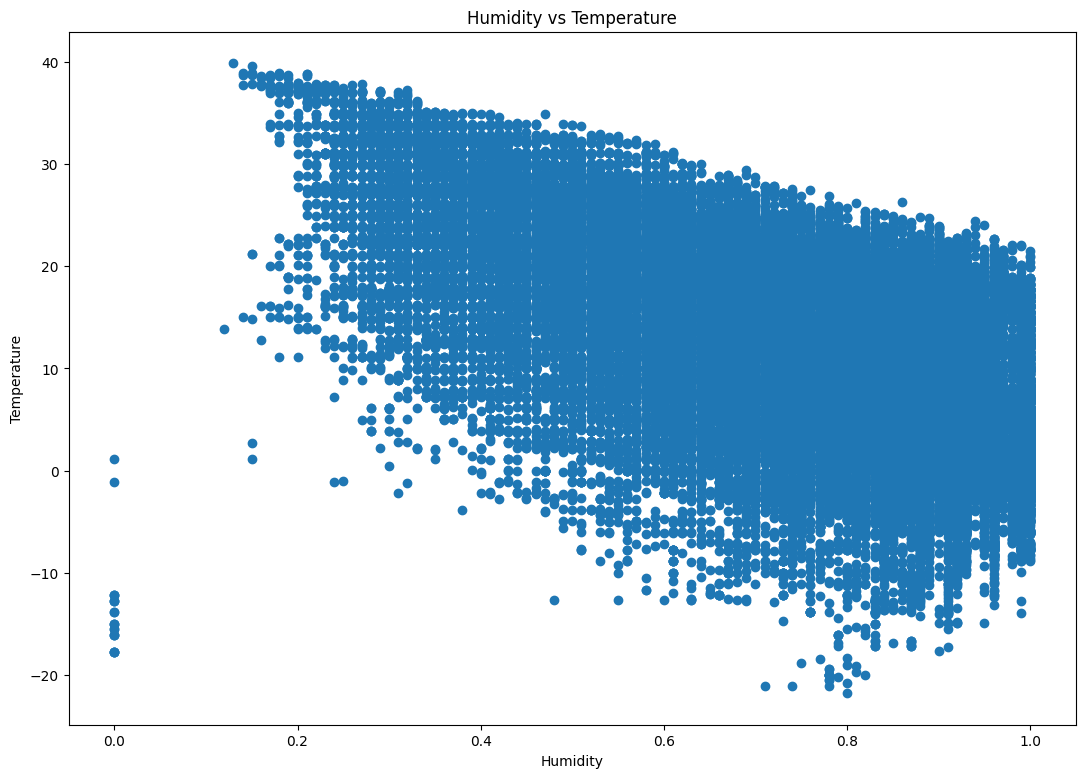

In [ ]:
# Trực quan hoá dữ liệu bằng biểu đồ
plt.figure(figsize=(13, 9))
plt.scatter(data_selected['Humidity'], data_selected['Temperature (C)'])
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.title('Humidity vs Temperature')
plt.show()

In [ ]:
# Dữ liệu quá dày đặt, ta tiến hành cắt bớt dữ liệu để phân tích
# Thực hiện lấy 600 điểm dữ liệu của `data_selected`
# YOUR CODE HERE
data_selected = data[['Humidity', 'Temperature (C)']].sample(600)

data_selected.shape

(600, 2)

In [ ]:
data_selected.columns=['Hum','Tmp']

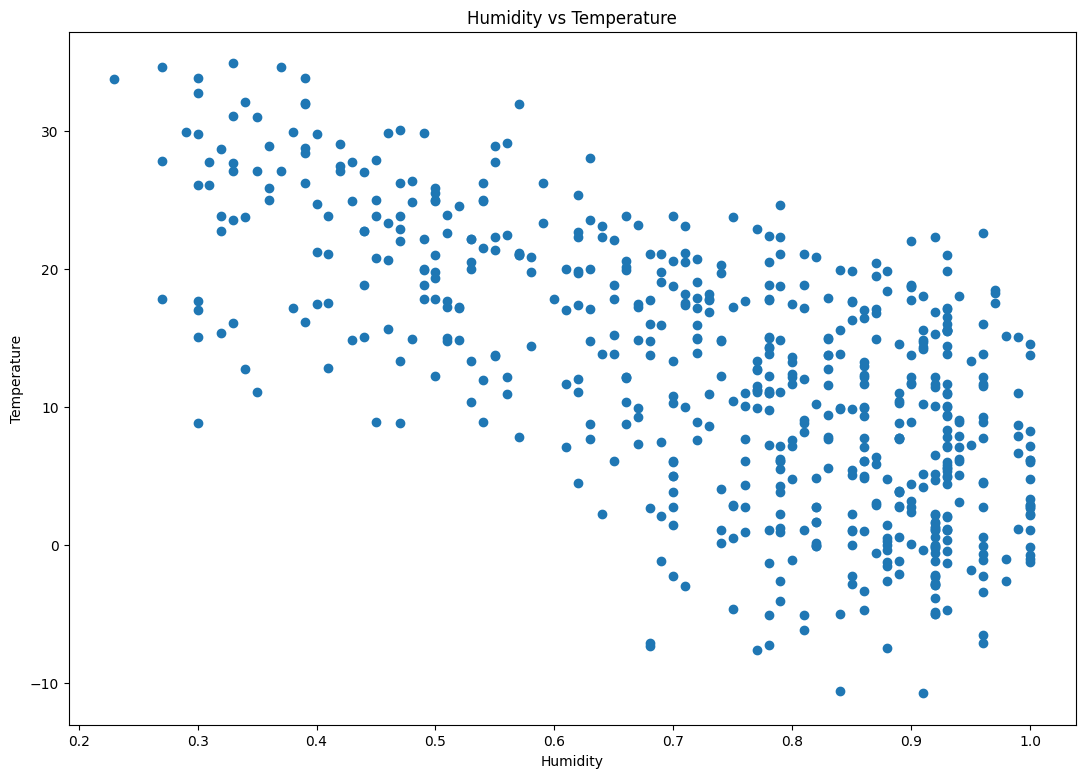

In [ ]:
# Sử dụng biểu đồ để phân tích trên 600 điểm dữ liệu đã cắt
plt.figure(figsize=(13, 9))
plt.scatter(data_selected["Hum"], data_selected["Tmp"])
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.title('Humidity vs Temperature')
plt.show()

Ta có thể thấy rằng giữa `Humidity` và `Temperature` có quan hệ `tuyến tính` với nhau.

## 2. Sử dụng Linear Regression để tìm ra quan hệ giữa 2 trường dữ liệu
Tiếp theo đây, chúng ta sẽ thực hiện mô hình Linear Reggression đã cài đặt tại `Phần 1` để thực hiện nội dung này.



In [ ]:
# Lấy ra trường `Humidity` và `Temperature` để tiến hành huấn luyện
# YOUR CODE HERE

hum = data_selected['Hum'].values.reshape(-1, 1)
tmp = data_selected['Tmp'].values.reshape(-1, 1)

input_dim = 1

input = Input(shape = input_dim)
output = Dense(1, use_bias=True, activation=None)(input)
LinearRegression = Model(input, output)

loss = 'mae'
opt = tf.keras.optimizers.SGD(learning_rate=0.1)
LinearRegression.compile(optimizer=opt, loss=loss)

hist = LinearRegression.fit(hum, tmp, epochs=35)

Epoch 1/35
19/19 [==============================] - 0s 2ms/step - loss: 11.3505
Epoch 2/35
19/19 [==============================] - 0s 2ms/step - loss: 10.4665
Epoch 3/35
19/19 [==============================] - 0s 2ms/step - loss: 9.8506
Epoch 4/35
19/19 [==============================] - 0s 2ms/step - loss: 9.4510
Epoch 5/35
19/19 [==============================] - 0s 2ms/step - loss: 9.1601
Epoch 6/35
19/19 [==============================] - 0s 2ms/step - loss: 8.9617
Epoch 7/35
19/19 [==============================] - 0s 2ms/step - loss: 8.8233
Epoch 8/35
19/19 [==============================] - 0s 2ms/step - loss: 8.7164
Epoch 9/35
19/19 [==============================] - 0s 2ms/step - loss: 8.6353
Epoch 10/35
19/19 [==============================] - 0s 2ms/step - loss: 8.5816
Epoch 11/35
19/19 [==============================] - 0s 2ms/step - loss: 8.5386
Epoch 12/35
19/19 [==============================] - 0s 2ms/step - loss: 8.5043
Epoch 13/35
19/19 [============================

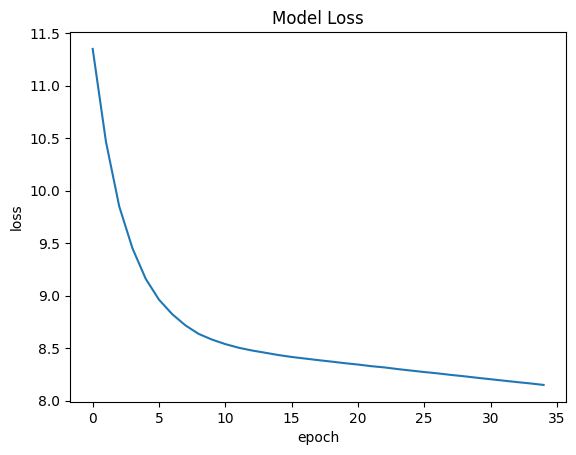

In [ ]:
# Hiển thị loss theo số epoch
plt.plot(hist.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

## 3. Kiểm tra, trực quan hóa kết quả dựa trên biểu đồ và các giá trị độ chính xác

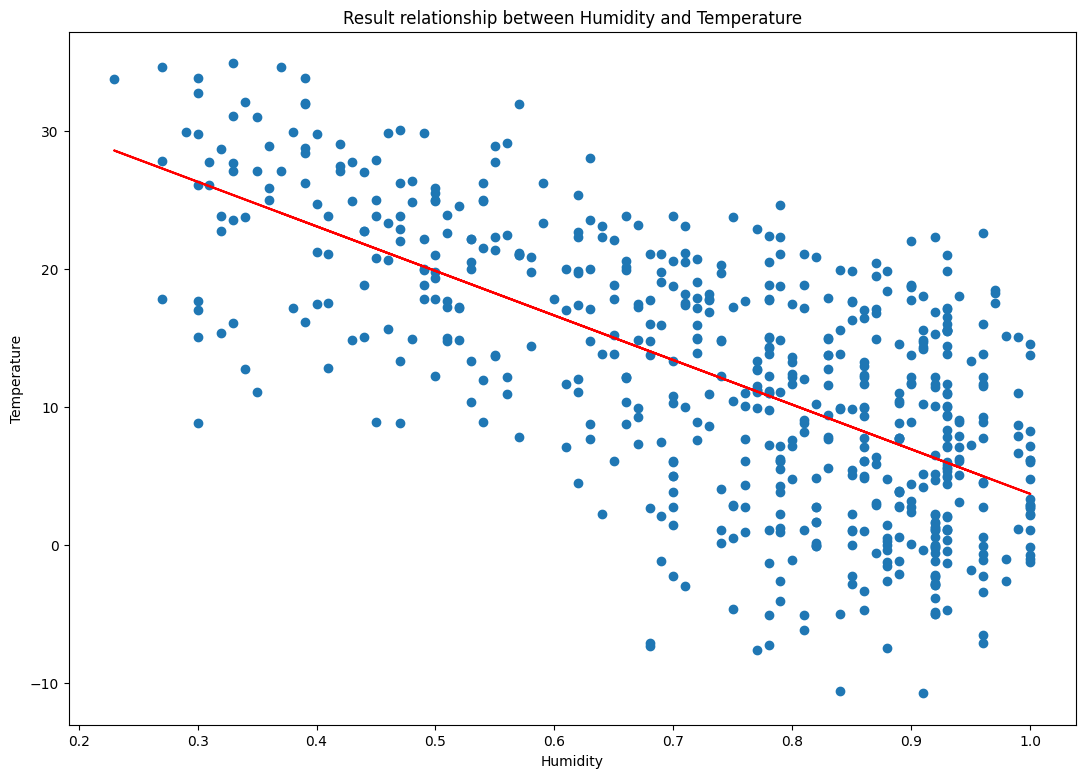

In [ ]:
# Thể hiện kết quả thu được dựa trên mô hình Linear Regession
plt.figure(figsize=(13, 9))
plt.scatter(hum,tmp)

# Dự đoán các giá trị temperature dựa trên mô hình Linear Regession đã huấn luyện
# YOUR CODE HERE
tmp_predict = model.predict(hum)

plt.plot(hum,tmp_predict, color='red')
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.title('Result relationship between Humidity and Temperature')
plt.show()

:Tìm hiểu về các độ lỗi `MSE`, `MAE`, `MAPE` và cho biết ý nghĩa của chúng là gì và chúng thể hiện điều gì?

Mean Squared Error (MSE):

Ý nghĩa: MSE đo lường trung bình của bình phương sai giữa các giá trị dự đoán và giá trị thực tế.
Công thức: MSE = (1/n) * Σ(y - ŷ)^2, trong đó y là giá trị thực tế, ŷ là giá trị dự đoán, n là số lượng mẫu.
Thể hiện: MSE tính toán sự khác biệt bình phương trung bình giữa các dự đoán và giá trị thực tế. Giá trị MSE càng thấp, tức là mô hình dự đoán càng chính xác. MSE có đơn vị là đơn vị bình phương của đại lượng ban đầu.

Mean Absolute Error (MAE):

Ý nghĩa: MAE đo lường trung bình của độ sai lệch tuyệt đối giữa các giá trị dự đoán và giá trị thực tế.
Công thức: MAE = (1/n) * Σ|y - ŷ|, trong đó y là giá trị thực tế, ŷ là giá trị dự đoán, n là số lượng mẫu.
Thể hiện: MAE tính toán sự khác biệt trung bình giữa các dự đoán và giá trị thực tế mà không xem xét hướng của sai số. Giá trị MAE càng thấp, tức là mô hình dự đoán càng chính xác. MAE có đơn vị giống với đơn vị của đại lượng ban đầu.

Mean Absolute Percentage Error (MAPE):

Ý nghĩa: MAPE đo lường trung bình của tỷ lệ phần trăm sai số tuyệt đối giữa các giá trị dự đoán và giá trị thực tế.
Công thức: MAPE = (1/n) * Σ(|(y - ŷ) / y| * 100), trong đó y là giá trị thực tế, ŷ là giá trị dự đoán, n là số lượng mẫu.
Thể hiện: MAPE tính toán tỷ lệ phần trăm trung bình của sai số tuyệt đối giữa các dự đoán và giá trị thực tế. MAPE cung cấp một cách để đánh giá sự sai lệch dự đoán theo phần trăm của giá trị thực tế. Giá trị MAPE càng thấp, tức là mô hình dự đoán càng chính xác. MAPE được tính theo phần trăm (%).

Các độ lỗi này cung cấp thông tin quan trọng về chất lượng của mô hình dự đoán. MSE, MAE và MAPE đều được sử dụng để đánh giá hiệu suất của mô hình và so sánh giữa các mô hình khác nhau

In [ ]:
mse = tf.keras.losses.MeanSquaredError()
mse(tmp, tmp_predict).numpy()

50.50506071653341

In [ ]:
# YOUR CODE HERE
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(tmp, tmp_predict)
print(mae)

In [ ]:
# YOUR CODE HERE
from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(tmp, tmp_predict)
print(mape)

HẾT RỒI, CHÚC MỪNG BẠN ĐÃ HOÀN THÀNH.